In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pathlib import Path

plt.style.use("dark_background")
print("Voila!")

Voila!


In [105]:
dataset_url = r"https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset"
filepath = Path("../sample csv data/Spotify Tracks Dataset.csv")
print(dataset_url, filepath.exists())

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset True


In [96]:
INCLUDE_COLUMN = [
    'danceability', 'energy',
    'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature',
    'popularity'
]
FEATURES = ['speechiness']
Y_LABEL = 'popularity'

df = (
    pd.read_csv(filepath, usecols=INCLUDE_COLUMN, nrows=500)
    .dropna()
    .drop_duplicates()
)

In [97]:
df.shape

(474, 12)

In [98]:
X = df.loc[:, FEATURES]
y = df[Y_LABEL]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
r2_score(y_test, model.predict(X_test))

-0.015871161176994608

In [89]:
X_train.shape

(65027, 1)

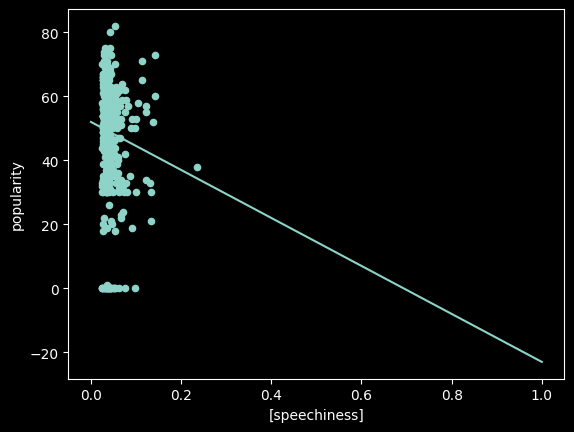

In [103]:
df.plot.scatter(FEATURES, Y_LABEL)
plt.plot(np.linspace(0, 1), model.coef_ * np.linspace(0, 1) + model.intercept_)